# Library importation

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data creation

In [2]:
recordsss = 100
n_inputss = 5
n_outputs = 1
normalize = 100

In [3]:
Data = [
    [
        [(j+i)/normalize] for i in range(n_inputss)
    ] for j in range(recordsss)
]

In [4]:
target = [(k+n_inputss)/normalize for k in range(recordsss)]

In [5]:
Data[0:n_inputss]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [6]:
target[0:n_inputss]

[0.05, 0.06, 0.07, 0.08, 0.09]

In [7]:
data = np.array(Data, dtype=float)
target = np.array(target, dtype=float)

In [8]:
data.shape

(100, 5, 1)

In [9]:
target.shape

(100,)

# Data split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size = 0.2, random_state = 4
)

# Model creation

In [11]:
model = Sequential()

2022-11-29 12:59:13.844155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 12:59:13.844982: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.add(
    LSTM(
        (1),
        batch_input_shape = (None, n_inputss, 1),
        return_sequences = True,
        # activation = "relu",
        name = "layer_1_lstm"
    )
)
model.add(
    LSTM(
        (1),
        return_sequences = True,
        # activation = "relu",
        name = "layer_2_lstm"
    )
)
model.add(
    LSTM(
        (1),
        return_sequences = False,
        # activation = "relu",
        name = "layer_3_lstm"
    )
)

In [13]:
model.compile(
    loss = "mean_absolute_error",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1_lstm (LSTM)         (None, 5, 1)              12        
                                                                 
 layer_2_lstm (LSTM)         (None, 5, 1)              12        
                                                                 
 layer_3_lstm (LSTM)         (None, 1)                 12        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


# Model training

In [15]:
history = model.fit(
    x_train,
    y_train,
    epochs = 400,
    validation_data = (
        x_test,
        y_test
    ),
    verbose = 0
)

# Model evaluation

In [16]:
results = model.predict(x_test)

1/1 [==============================] - 1s 642ms/step


In [17]:
results[0:n_inputss]

array([[0.23467214],
       [0.16895904],
       [0.86354226],
       [0.20562269],
       [0.705716  ]], dtype=float32)

In [18]:
y_test[0:n_inputss]

array([0.25, 0.15, 1.01, 0.21, 0.68])

In [19]:
# results = results*normalize

In [20]:
# y_test = y_test*normalize

In [21]:
results[0:n_inputss]

array([[0.23467214],
       [0.16895904],
       [0.86354226],
       [0.20562269],
       [0.705716  ]], dtype=float32)

In [22]:
y_test[0:n_inputss]

array([0.25, 0.15, 1.01, 0.21, 0.68])

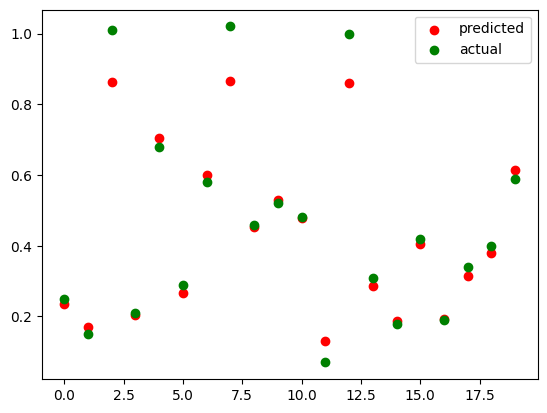

In [23]:
plt.scatter(
    range(20),
    results,
    c = "r",
    label="predicted"
)
plt.scatter(
    range(20),
    y_test,
    c = "g",
    label="actual"
)
plt.legend()
plt.show()

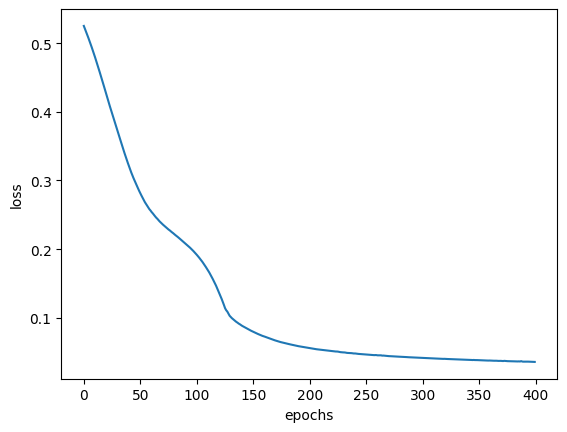

In [24]:
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()